In [1]:
# modules
import os
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import warnings

#File to load
file_to_load = "Data/final_dataset.csv"

#import data from spread sheet 
airport_data = pd.read_csv(file_to_load)
airport_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0


In [2]:
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


airport_data['delay_sum'] = airport_data[col_list].sum(axis=1)
airport_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [3]:
airport_groups = airport_data.groupby(['airport_name'])['total_number_flights']
airport_flighttotals = airport_groups.sum()

airport_df_totalflights = airport_flighttotals.reset_index()
airport_df_totalflights.head()


,airport_name,total_number_flights
0,Aberdeen Regional Airport,808.0
1,Abilene Regional Airport,2371.0
2,Abraham Lincoln Capital Airport,1898.0
3,Adak Airport,113.0
4,Akron-Canton Airport,7353.0


In [4]:
sorted_df = airport_df_totalflights.sort_values('total_number_flights',axis=0,ascending=False)
sorted_df.reset_index()
sorted_df.nlargest(25,'total_number_flights').reset_index()

,index,airport_name,total_number_flights
0,15,Atlanta International Airport,425255.0
1,63,Chicago O'hare International Airport,367499.0
2,77,Dallas/Fort Worth International Airport,319212.0
3,84,Denver International Airport,265815.0
4,57,Charlotte/Douglas International Airport,253116.0
5,185,Los Angeles International Airport,237975.0
6,44,Bush Intercontinental Airport,192696.0
7,247,Phoenix Sky Harbor International Airport,187507.0
8,283,San Francisco International Airport,186577.0
9,169,La Guardia Airport,185731.0


In [5]:
sorted_df_top25 = sorted_df.nlargest(25,'total_number_flights').reset_index()
sorted_df_top25


,index,airport_name,total_number_flights
0,15,Atlanta International Airport,425255.0
1,63,Chicago O'hare International Airport,367499.0
2,77,Dallas/Fort Worth International Airport,319212.0
3,84,Denver International Airport,265815.0
4,57,Charlotte/Douglas International Airport,253116.0
5,185,Los Angeles International Airport,237975.0
6,44,Bush Intercontinental Airport,192696.0
7,247,Phoenix Sky Harbor International Airport,187507.0
8,283,San Francisco International Airport,186577.0
9,169,La Guardia Airport,185731.0


<BarContainer object of 25 artists>

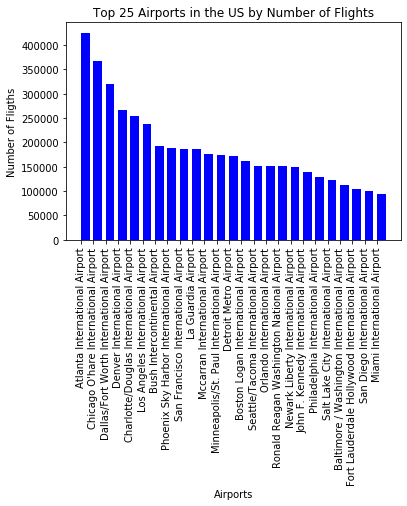

In [20]:
x_axis = sorted_df_top25["airport_name"]
y_axis = sorted_df_top25["total_number_flights"]
plt.title("Top 25 Airports in the US by Number of Flights")
plt.xlabel("Airports")
plt.ylabel("Number of Fligths")

total_number_flights_graph = plt.bar(x_axis, y_axis, color="b", align="edge", width =0.7)                             

plt.xticks(rotation=90)

total_number_flights_graph